In [ ]:
#we import the libraries we need
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#create a geodataframe from the file
dfg = gpd.read_file(r"C:\Users\Eduardo\Desktop\Here-Hackaton\data\STREETS_NAV\SREETS_NAV_4815075.geojson")


In [ ]:
#view the dataset
print(dfg.head())

  AR_AUTO AR_BUS AR_CARPOOL AR_DELIV AR_EMERVEH AR_MOTOR AR_PEDEST AR_TAXIS  \
0       Y      Y          Y        Y          Y        Y         Y        Y   
1       Y      Y          Y        Y          Y        Y         Y        Y   
2       Y      Y          Y        Y          Y        Y         Y        Y   
3       Y      Y          Y        Y          Y        Y         Y        Y   
4       Y      Y          Y        Y          Y        Y         Y        Y   

  AR_TRAFF AR_TRUCKS  ... RAMP ROUNDABOUT SPEED_CAT TOLLWAY TO_LANES  \
0        Y         Y  ...    N          N         7       N        0   
1        Y         Y  ...    N          N         7       N        0   
2        Y         Y  ...    N          N         7       N        0   
3        Y         Y  ...    N          N         7       N        0   
4        Y         Y  ...    N          N         7       N        0   

  TO_SPD_LIM  TUNNEL UNDEFTRAFF  URBAN  \
0          0       N          N      Y   
1       

In [ ]:
# select the variables to train the model 
vars = ["BRIDGE", "DIR_TRAVEL", "DIVIDER", "FRONTAGE", "LANE_CAT", "link_id", "MULTIDIGIT", "POIACCESS",
        "PUB_ACCESS", "RAMP", "ROUNDABOUT", "TUNNEL", "geometry"]

data_new = dfg[vars].copy()

In [ ]:
#clean dataset
data_new

,BRIDGE,DIR_TRAVEL,DIVIDER,FRONTAGE,LANE_CAT,link_id,MULTIDIGIT,POIACCESS,PUB_ACCESS,RAMP,ROUNDABOUT,TUNNEL,geometry
0,N,F,N,N,1,1115212395,N,N,Y,N,N,N,"LINESTRING (-99.631 19.269, -99.631 19.269, -9..."
1,N,B,N,N,1,702663287,N,N,Y,N,N,N,"LINESTRING (-99.634 19.27, -99.633 19.271)"
2,N,B,N,N,1,1272517807,N,N,Y,N,N,N,"LINESTRING (-99.632 19.268, -99.632 19.27, -99..."
3,N,T,N,N,1,1115212390,N,N,Y,N,N,N,"LINESTRING (-99.631 19.27, -99.631 19.27, -99...."
4,N,B,N,N,1,702699915,N,N,Y,N,N,N,"LINESTRING (-99.635 19.27, -99.634 19.271)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,N,B,N,N,1,1236871238,N,N,Y,N,N,N,"LINESTRING (-99.51 19.335, -99.51 19.335)"
31202,N,B,N,N,1,847951420,N,N,Y,N,N,N,"LINESTRING (-99.511 19.335, -99.512 19.335, -9..."
31203,N,F,N,N,2,1316970816,Y,N,Y,N,N,N,"LINESTRING (-99.51 19.335, -99.51 19.335)"
31204,N,B,N,N,1,850408491,N,N,Y,N,N,N,"LINESTRING (-99.527 19.335, -99.528 19.336)"


In [ ]:
#IMPORT THE NECESSARY LIBRARIES
from sklearn.cluster import KMeans
import pandas as pd

# DROP 'geometry' and 'link_id' columns for clustering
X = data_new.drop(columns=['geometry', 'link_id'])

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_new['cluster'] = kmeans.fit_predict(X_encoded)

In [ ]:
print(data_new[['cluster']].head())



   cluster
0        1
1        1
2        1
3        1
4        1


In [ ]:
#cargamos el shapefile
print(data_new['cluster'].value_counts())



cluster
1    20782
2     5342
0     5082
Name: count, dtype: int64


In [ ]:
#cargamos el shapefile
print(data_new.head())

  BRIDGE DIR_TRAVEL DIVIDER FRONTAGE LANE_CAT     link_id MULTIDIGIT  \
0      N          F       N        N        1  1115212395          N   
1      N          B       N        N        1   702663287          N   
2      N          B       N        N        1  1272517807          N   
3      N          T       N        N        1  1115212390          N   
4      N          B       N        N        1   702699915          N   

  POIACCESS PUB_ACCESS RAMP ROUNDABOUT TUNNEL  \
0         N          Y    N          N      N   
1         N          Y    N          N      N   
2         N          Y    N          N      N   
3         N          Y    N          N      N   
4         N          Y    N          N      N   

                                            geometry  cluster  
0  LINESTRING (-99.631 19.269, -99.631 19.269, -9...        1  
1         LINESTRING (-99.634 19.27, -99.633 19.271)        1  
2  LINESTRING (-99.632 19.268, -99.632 19.27, -99...        1  
3  LINESTRING (-

In [ ]:
#cargamos el shapefile
print(X.head())

  BRIDGE DIR_TRAVEL DIVIDER FRONTAGE LANE_CAT MULTIDIGIT POIACCESS PUB_ACCESS  \
0      N          F       N        N        1          N         N          Y   
1      N          B       N        N        1          N         N          Y   
2      N          B       N        N        1          N         N          Y   
3      N          T       N        N        1          N         N          Y   
4      N          B       N        N        1          N         N          Y   

  RAMP ROUNDABOUT TUNNEL  
0    N          N      N  
1    N          N      N  
2    N          N      N  
3    N          N      N  
4    N          N      N  


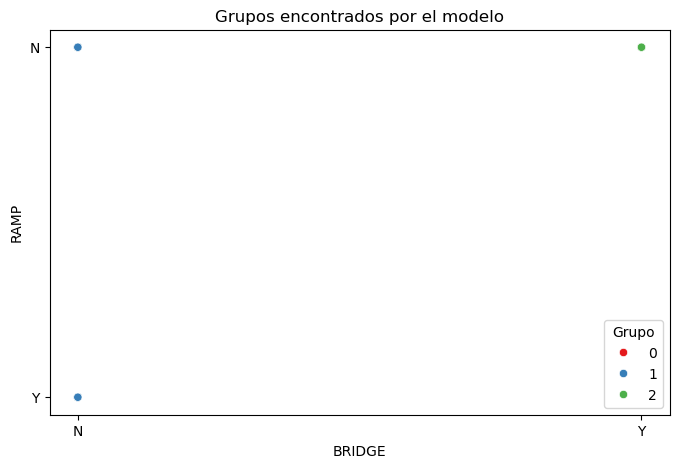

In [ ]:
# view the columns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_new, x='BRIDGE', y='RAMP', hue='cluster', palette='Set1')
plt.title('Grupos encontrados por el modelo')
plt.xlabel('BRIDGE')
plt.ylabel('RAMP')
plt.legend(title='Grupo')
plt.show()